Major Project Task:                                              
Predective Analysis and Customer Segmentation for an E- Commerce Platform

Step - 1: Data Cleaning and Preprocessing

In [11]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#uploading dataset file
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
#reading the dataset and assigning the dataframe
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [6]:
#calling the dataframe to display data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
#displaying 1st 5rows of dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
#descriibing the statistics of data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
#displaying information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
#checking for null values in dataset
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
#removing null values
data=data.dropna()

In [16]:
#checking for null values again
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
#displaying number of unique values of each column
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

Step -2: Exploratory Data Analysis

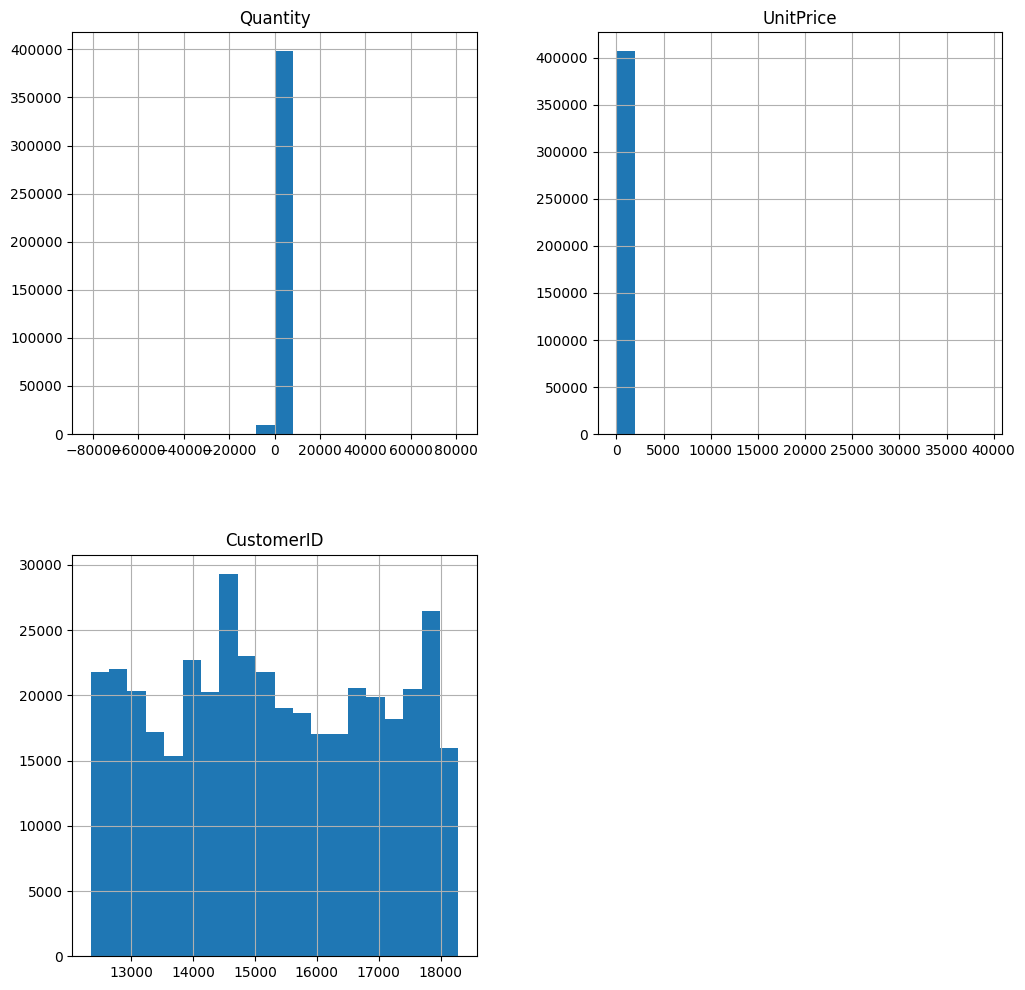

In [18]:
#Histogram plot
data.hist(bins=20, figsize=(12, 12))
plt.show()

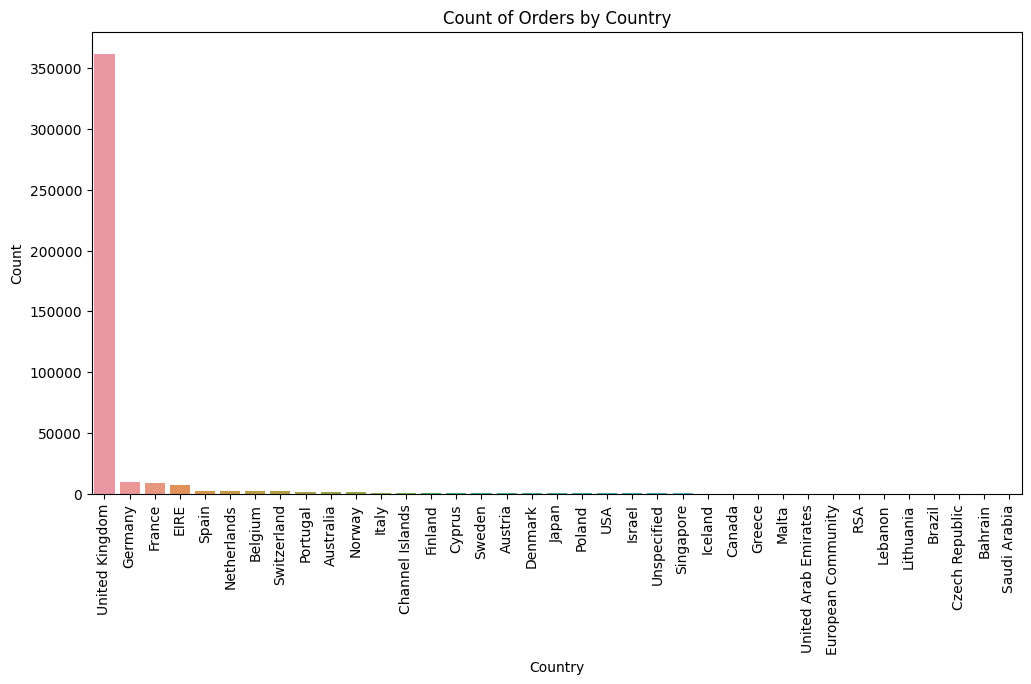

In [19]:
#Countplot
categorical_column = 'Country'

# Create a countplot of the selected categorical column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x=categorical_column, order=data[categorical_column].value_counts().index)
plt.xticks(rotation=90)
plt.title(f'Count of Orders by {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.show()


<ipython-input-20-d063bdbad5d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


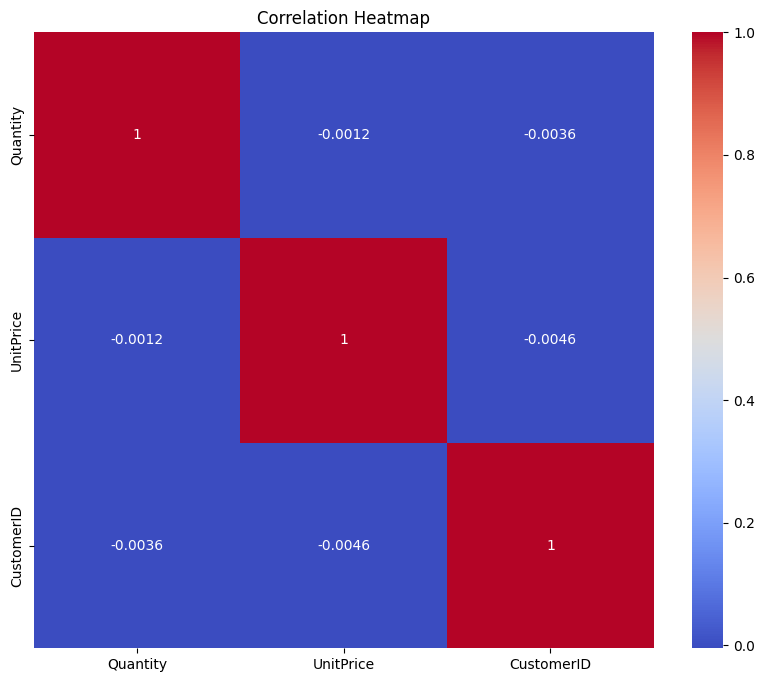

In [20]:
# Creating correlation matrix
correlation_matrix = data.corr()

# Creating heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Step-3: Feature Engineering and Data Transformation

In [21]:
# Calculate the total number of unique products purchased by each customer
customer_order_counts = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_order_counts.rename(columns={'InvoiceNo': 'TotalOrders'}, inplace=True)

# Drop duplicate values in the 'TotalOrders' column
customer_order_counts.drop_duplicates(subset=['TotalOrders'], inplace=True)

# Define customer segments based on order counts
customer_order_counts['CustomerSegment'] = pd.qcut(customer_order_counts['TotalOrders'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Merge the segments back into the main DataFrame
data = data.merge(customer_order_counts[['CustomerID', 'CustomerSegment']], on='CustomerID', how='left')


In [23]:
#removing duplicate values and displaying data
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerSegment
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Very High
175,536386,84880,WHITE WIRE EGG HOLDER,36,12/1/2010 9:57,4.95,16029.0,United Kingdom,Very High
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,12/1/2010 9:57,1.65,16029.0,United Kingdom,Very High
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 9:57,1.65,16029.0,United Kingdom,Very High
178,536387,79321,CHILLI LIGHTS,192,12/1/2010 9:58,3.82,16029.0,United Kingdom,Very High
...,...,...,...,...,...,...,...,...,...
406779,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,12/9/2011 12:20,4.95,12748.0,United Kingdom,Very High
406810,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,High
406811,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,High
406812,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,High


In [25]:
#Creating new column named Total Price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [26]:
#seperating data of column Invoice Date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
monthly_sales = data.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

In [28]:
#displaying data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerSegment,Year,Month,Day,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,2010,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,2010,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,2010,12,1,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,NaN,2011,12,9,12,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,NaN,2011,12,9,12,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,2011,12,9,12,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,2011,12,9,12,16.60


Step-4: Predictive Model Building

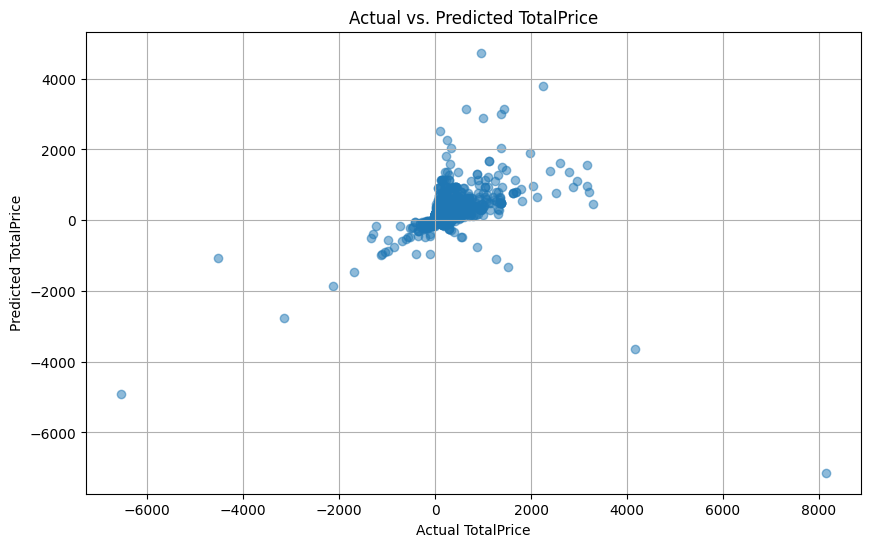

In [29]:
#Linear Regression model plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data[['Quantity', 'UnitPrice']]
y = data['TotalPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.title("Actual vs. Predicted TotalPrice")
plt.grid(True)
plt.show()

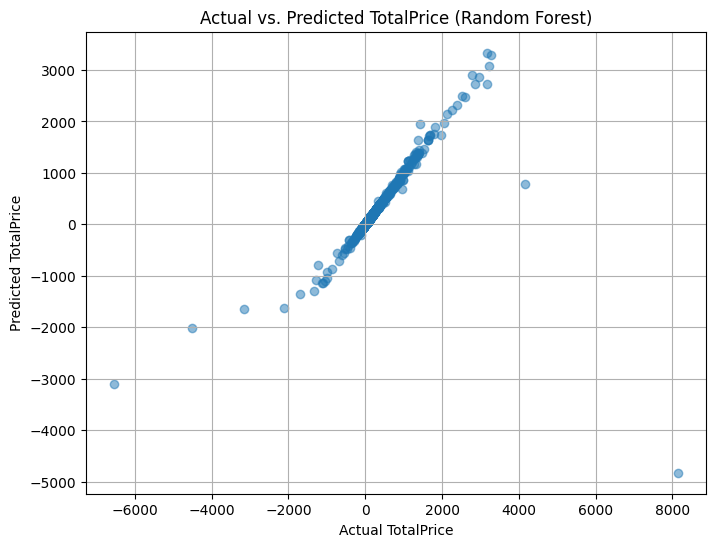

In [30]:
#Random Forest regression plot
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
X = data[['Quantity', 'UnitPrice']]
y = data['TotalPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.title("Actual vs. Predicted TotalPrice (Random Forest)")
plt.grid(True)
plt.show()

Step-5: Evaluating the models

In [33]:
#Evaluating Random forest model
mae_rf = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)


Mean Absolute Error (MAE): 0.4249188444806051
Mean Squared Error (MSE): 2479.397766598503
Root Mean Squared Error (RMSE): 49.793551455971716


In [36]:
#Evaluating Linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 15.924114423604436
Mean Squared Error (MSE): 6875.822210958749
Root Mean Squared Error (RMSE): 82.92057772928713


In [42]:
#selecting the columns
x = data.iloc[:, [3, 4]].values

Step-6: Clustering and Segmentation

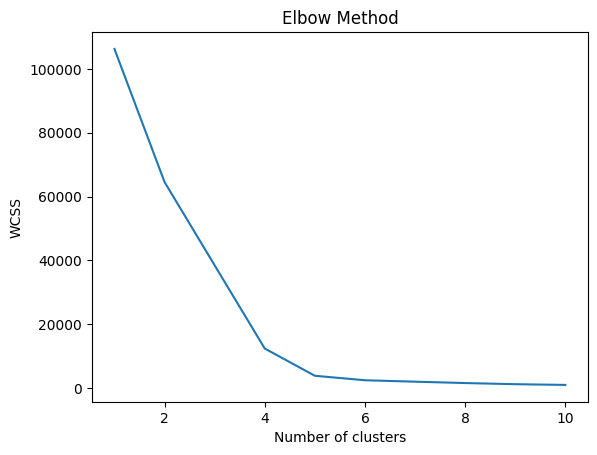

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset

# Select relevant features
X = data[['Quantity', 'UnitPrice']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



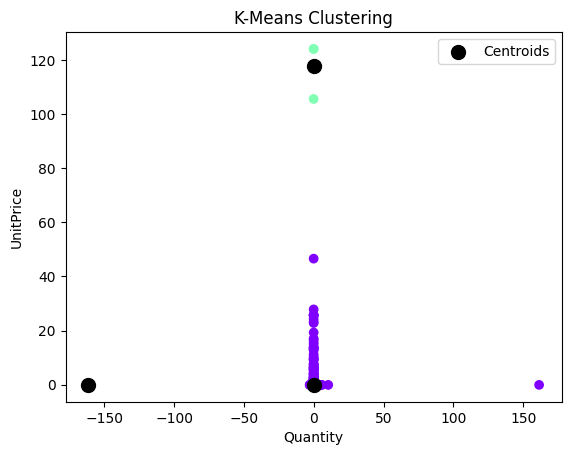

In [54]:
# Based on the Elbow Method, choose an appropriate K value (e.g., 3)

# Perform K-Means clustering with the chosen K value
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the coordinates of cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()


In [55]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'MSE': [mse, mse_rf]
})

print(results)

                      Model          MSE
0         Linear Regression  6875.822211
1  Random Forest Regression  2479.397767
